In [2]:
#Importing relevant libraries
import cv2
import numpy as np
#Replacement imshow function for Google Colab
#Remove this and use cv2.imshow for Jupyter Notebook
from google.colab.patches import cv2_imshow 

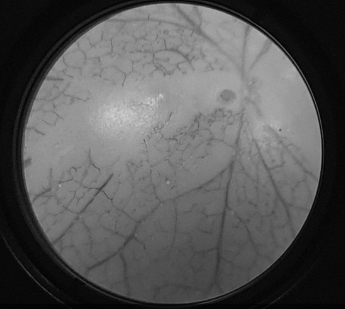

In [3]:
#Read image
img=cv2.imread("funduscopy.PNG") #Insert image path here
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grey_img)

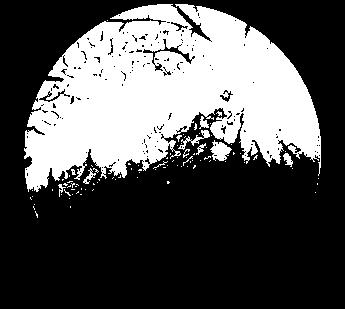

In [4]:
_,mask=cv2.threshold(grey_img, thresh=130,maxval=255,type=cv2.THRESH_BINARY)
cv2_imshow(mask)

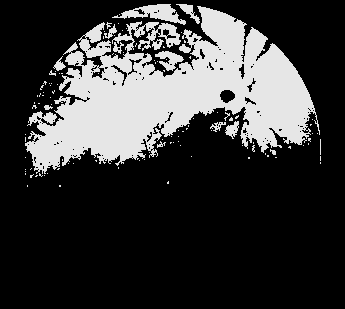

In [5]:
(thresh, blackAndWhiteImage) = cv2.threshold(grey_img, 140, 230, cv2.THRESH_BINARY)
cv2_imshow(blackAndWhiteImage)

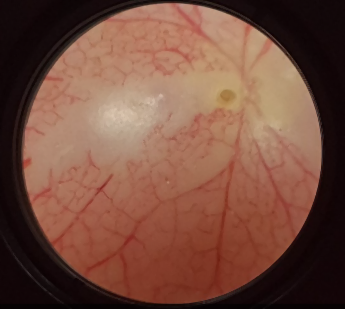

In [6]:
#Apply median blur (creates a blurry version of original image for mask creation)
median=cv2.medianBlur(img,3)
cv2_imshow(median)

This cell can be modified for the colour being searched for (black is the absence of colour; i.e. (0,0,0) RGB (upper threshold because true RGB black is extremely rare).

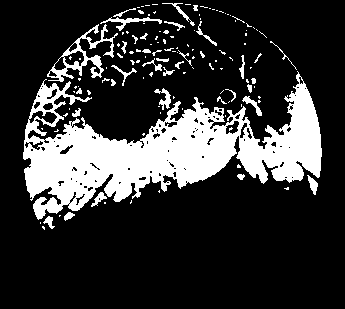

In [14]:
#Applies a filter (in example for black only) 
#Requires experimenting
lower = (80,80,80) 
upper = (179,179,179) 
thresh = cv2.inRange(median, lower, upper)
cv2_imshow(thresh)

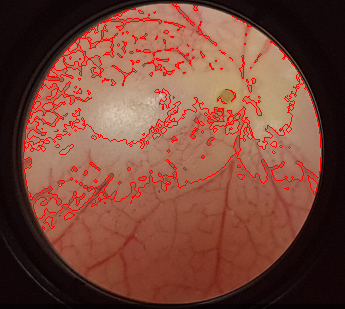

In [27]:
#Find contours of the image
contours = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1] #Takes contour list
#Apply to mask
result = img.copy() #Copies original image to draw on
#Initialise loop to draw contours
for i in contours:
  area = cv2.contourArea(i) #Takes area of given contour
  if area > 0:  #Checks threshold for area of contour is suitable; omits small contours
    cv2.drawContours(result, [i], -1, (0, 0, 255), 1) #Draws contour on results
cv2_imshow(result) 